<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/BI0002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha':0.25, 's':80, 'linewidths':0}

In [2]:
!wget https://raw.githubusercontent.com/scikit-learn-contrib/hdbscan/master/notebooks/clusterable_data.npy

--2023-06-07 05:13:52--  https://raw.githubusercontent.com/scikit-learn-contrib/hdbscan/master/notebooks/clusterable_data.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37024 (36K) [application/octet-stream]
Saving to: ‘clusterable_data.npy.1’

clusterable_data.np 100%[===================>]  36.16K  --.-KB/s    in 0.002s  

2023-06-07 05:13:52 (15.4 MB/s) - ‘clusterable_data.npy.1’ saved [37024/37024]



In [3]:
data = np.load('clusterable_data.npy')

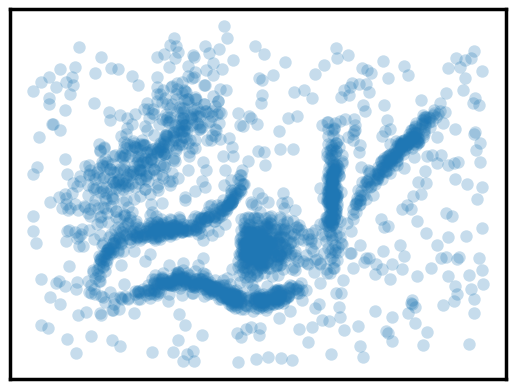

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(data.T[0], data.T[1], **plot_kwds)
ax.set_xticks([])
ax.set_yticks([]);

In [5]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


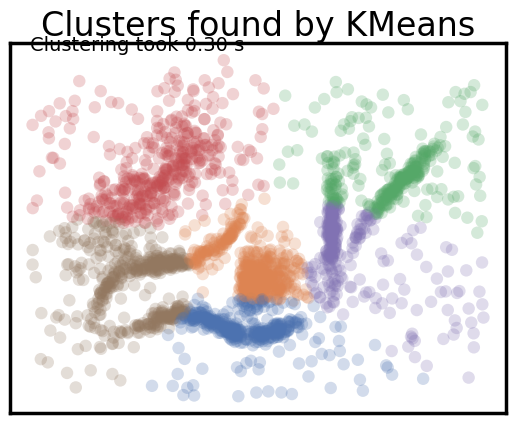

In [6]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':6})

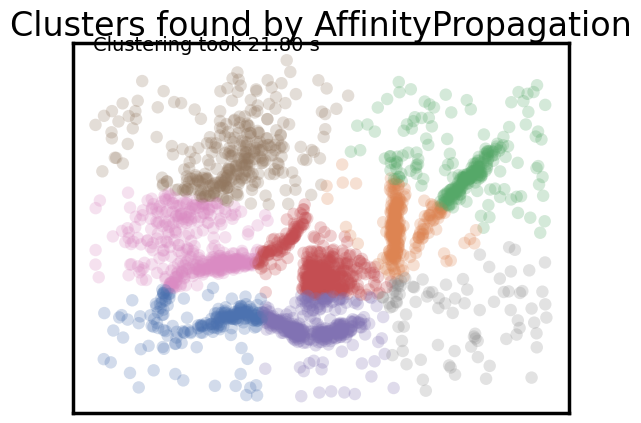

In [7]:
plot_clusters(data, cluster.AffinityPropagation, (), {'preference':-5.0, 'damping':0.95})

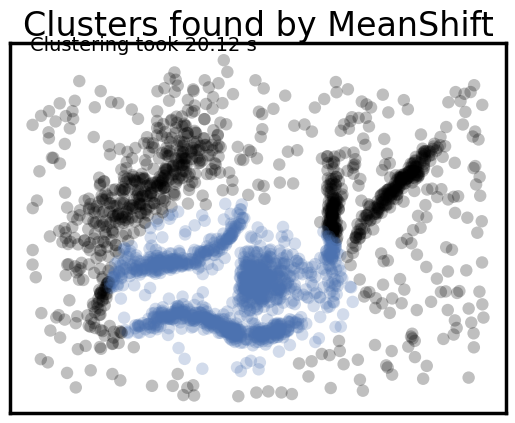

In [8]:
plot_clusters(data, cluster.MeanShift, (), {'cluster_all':False})

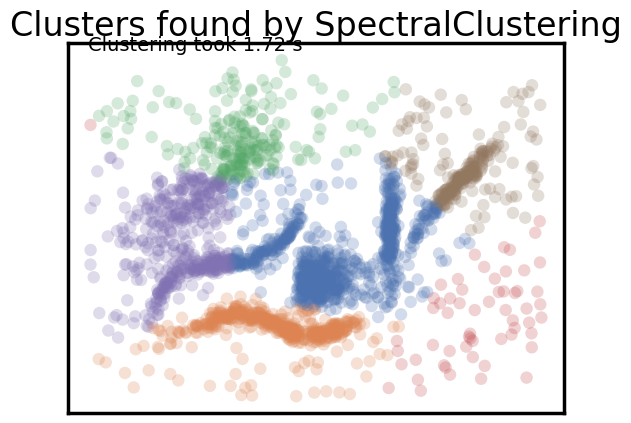

In [9]:
plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters':6})

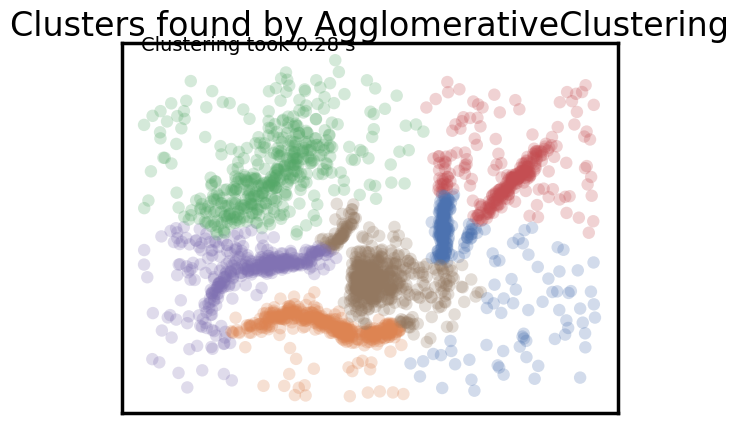

In [10]:
plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters':6, 'linkage':'ward'})

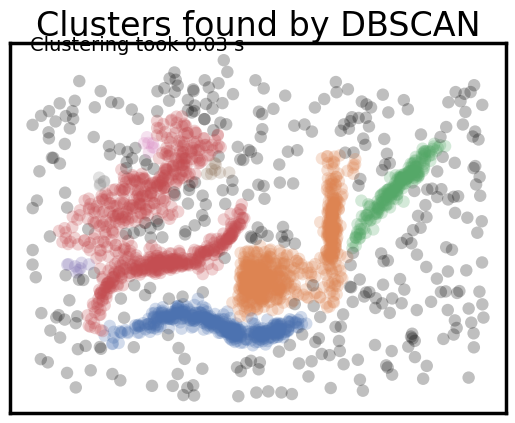

In [11]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.025})

In [12]:
!pip install hdbscan
import hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


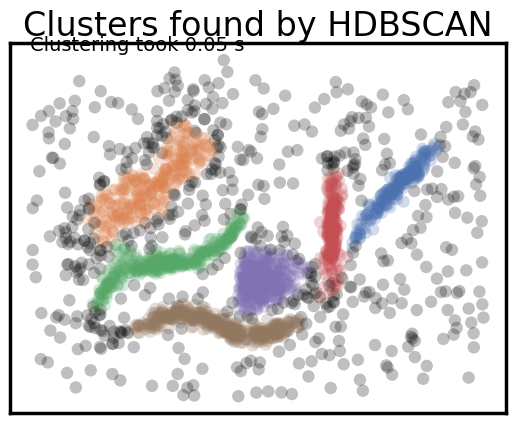

In [13]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':15})